# Importing the libraries and dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"C:\Users\Maintenant prêt\Downloads\10x\stock\raw_analyst_ratings.csv")

In [6]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


# Data exploration

In [7]:
df.shape

(1407328, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


Dealing with missing values

In [9]:
df.isnull().values.any()

np.False_

Dealing with unwanted columns

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
df.drop('url', axis=1, inplace=True)

In [14]:
df.head()

,headline,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,Vick Meyer,2020-05-22 11:38:59-04:00,A


unique publishers and stocks

In [15]:
unique_publishers = df['publisher'].nunique()
print("Number of unique publishers:", unique_publishers)

Number of unique publishers: 1034


In [16]:
unique_stocks = df['stock'].nunique()
print("Number of unique stocks:", unique_stocks)

Number of unique stocks: 6204


# Length of text in headline

In [17]:
df['Length'] = df['headline'].apply(len)

In [18]:
df.head()

,headline,publisher,date,stock,Length
0,Stocks That Hit 52-Week Highs On Friday,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,Stocks That Hit 52-Week Highs On Wednesday,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,71 Biggest Movers From Friday,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,46 Stocks Moving In Friday's Mid-Day Session,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,B of A Securities Maintains Neutral on Agilent...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   publisher  1407328 non-null  object
 2   date       1407328 non-null  object
 3   stock      1407328 non-null  object
 4   Length     1407328 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 53.7+ MB


In [20]:
df.Length.describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: Length, dtype: float64

In [21]:
df[df['Length']==512]['headline'].iloc[0]

'JinkoSolar Tiger Pro Series Receives World\'s First IEC 61701 Ed. 3 (FDIS) Certification for Salt Mist Corrosion Standards JinkoSolar Holding Co., Ltd. (the "Company," or "JinkoSolar") (NYSE:JKS), one of the largest and most innovative solar module manufacturers in the world, today announced that its innovative Tiger Pro Series of high-efficiency modules received the world\'s first IEC 61701 Ed. 3 (FDIS) certification for salt mist corrosion test issued by TÜV Nord AG, an independent provider of technical ser'

In [22]:
df[df['Length']==3]['headline'].iloc[0]

'SPY'

# Number of article per publisher

In [23]:
publisher_counts = df['publisher'].value_counts()

In [24]:
publisher_counts

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Matthew Ely               1
Frank Ochoa               1
Jeremie Capron            1
Marvin Dumont             1
Igor Gonta                1
Name: count, Length: 1034, dtype: int64

In [26]:
publisher_counts.describe()

count      1034.000000
mean       1361.052224
std       11501.954263
min           1.000000
25%           3.000000
50%          11.000000
75%          93.500000
max      228373.000000
Name: count, dtype: float64

# Sentiment analysis

In [34]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') 

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stop words
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    processed_text = []
    for word in words:
        word = word.lower()  
        word = lemmatizer.lemmatize(word)  
        if word not in stop_words:  
            processed_text.append(word)
    return ' '.join(processed_text)

# Apply the preprocessing function to the 'headline' column
df['processed_headline'] = df['headline'].apply(preprocess_text)

print(df)

[nltk_data] Downloading package punkt to C:\Users\Maintenant
[nltk_data]     prêt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Maintenant
[nltk_data]     prêt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Maintenant
[nltk_data]     prêt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Maintenant
[nltk_data]     prêt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                                  headline          publisher  \
0                  Stocks That Hit 52-Week Highs On Friday  Benzinga Insights   
1               Stocks That Hit 52-Week Highs On Wednesday  Benzinga Insights   
2                            71 Biggest Movers From Friday         Lisa Levin   
3             46 Stocks Moving In Friday's Mid-Day Session         Lisa Levin   
4        B of A Securities Maintains Neutral on Agilent...         Vick Meyer   
...                                                    ...                ...   
1407323             Top Narrow Based Indexes For August 29      Monica Gerson   
1407324  Recap: Wednesday's Top Percentage Gainers and ...       Benjamin Lee   
1407325  UPDATE: Oppenheimer Color on China Zenix Auto ...     BenzingaStaffL   
1407326  Oppenheimer Initiates China Zenix At Outperfor...          Joe Young   
1407327  China Zenix Auto International Opens For Tradi...      Allie Wickman   

                           

# Sentiment category

In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def classify_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment classification function to the processed headlines
df['sentiment'] = df['processed_headline'].apply(classify_sentiment)

print(df)

[nltk_data] Downloading package vader_lexicon to C:\Users\Maintenant
[nltk_data]     prêt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                  headline          publisher  \
0                  Stocks That Hit 52-Week Highs On Friday  Benzinga Insights   
1               Stocks That Hit 52-Week Highs On Wednesday  Benzinga Insights   
2                            71 Biggest Movers From Friday         Lisa Levin   
3             46 Stocks Moving In Friday's Mid-Day Session         Lisa Levin   
4        B of A Securities Maintains Neutral on Agilent...         Vick Meyer   
...                                                    ...                ...   
1407323             Top Narrow Based Indexes For August 29      Monica Gerson   
1407324  Recap: Wednesday's Top Percentage Gainers and ...       Benjamin Lee   
1407325  UPDATE: Oppenheimer Color on China Zenix Auto ...     BenzingaStaffL   
1407326  Oppenheimer Initiates China Zenix At Outperfor...          Joe Young   
1407327  China Zenix Auto International Opens For Tradi...      Allie Wickman   

                           

In [36]:
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
Neutral     727713
Positive    458559
Negative    221056
Name: count, dtype: int64


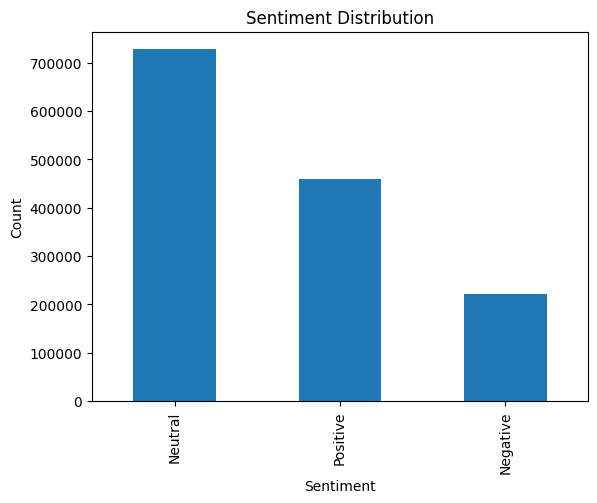

In [37]:
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [47]:
pip install scikit-learn


  Using cached scikit_learn-1.6.0-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.0-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [48]:
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# Preprocess text
def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
df['processed_headlines'] = df['headline'].apply(preprocess_text)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_headlines'])

# LDA
lda_model = LatentDirichletAllocation(n_components=2, random_state=42)
lda_model.fit(X_tfidf)

# Print top words for each topic
for topic_idx, topic in enumerate(lda_model.components_):
    print("Topic %d:" % (topic_idx + 1))
    print(" ".join([tfidf_vectorizer.get_feature_names_out()[i]
                     for i in topic.argsort()[:-10 - 1:-1]]))

Topic 1:
stock vs est ep earn move report session benzinga top
Topic 2:
market downgrad share upgrad updat pt buy rais announc lower


# Publication dates 

In [49]:
df['date'].describe()

count                 1407328
unique                  39957
top       2020-03-12 00:00:00
freq                     1766
Name: date, dtype: object

In [51]:
# convert to datetime
df['date'] = pd.to_datetime(df['date'], format='ISO8601')

In [55]:
df['year'] = df['date'].dt.year

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype                    
---  ------               --------------    -----                    
 0   headline             1407328 non-null  object                   
 1   publisher            1407328 non-null  object                   
 2   date                 1407328 non-null  datetime64[ns, UTC-04:00]
 3   stock                1407328 non-null  object                   
 4   Length               1407328 non-null  int64                    
 5   processed_headline   1407328 non-null  object                   
 6   sentiment            1407328 non-null  object                   
 7   processed_headlines  1407328 non-null  object                   
dtypes: datetime64[ns, UTC-04:00](1), int64(1), object(6)
memory usage: 85.9+ MB


In [56]:
# identify publication frequency over year
publication_frequency = df.groupby('year').size()
print(publication_frequency)

year
2009     11489
2010     81319
2011    131322
2012    122655
2013    121523
2014    134859
2015    135295
2016    141892
2017    124456
2018    146924
2019    150380
2020    105214
dtype: int64


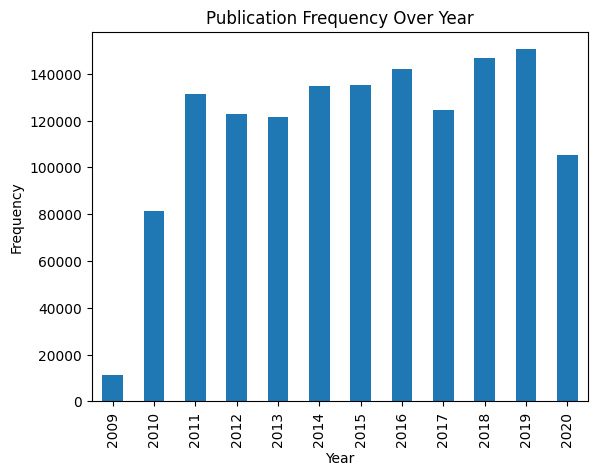

In [57]:
# plot
publication_frequency.plot(kind='bar')
plt.title('Publication Frequency Over Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [58]:
# identify publication frequency over month
df['month'] = df['date'].dt.month
publication_frequency_month = df.groupby('month').size()
print(publication_frequency_month)

month
1     121541
2     122835
3     121948
4     121815
5     130339
6     106600
7     110762
8     124042
9      96087
10    124800
11    121431
12    105128
dtype: int64


In [59]:
# identify publication frequency over day
df['day'] = df['date'].dt.day
publication_frequency_day = df.groupby('day').size()
print(publication_frequency_day)

day
1     46573
2     46905
3     45782
4     45358
5     47123
6     50039
7     50073
8     50682
9     48692
10    47793
11    46064
12    48610
13    47769
14    46714
15    44633
16    44206
17    44610
18    43857
19    44918
20    46435
21    44597
22    43161
23    46515
24    44040
25    43007
26    45571
27    47574
28    45049
29    41787
30    42008
31    27183
dtype: int64


In [60]:
# identify publication frequency over time
df['time'] = df['date'].dt.time
publication_frequency_time = df.groupby('time').size()
print(publication_frequency_time)

time
00:00:00    1351341
00:00:49          1
00:04:46          1
00:07:44          1
00:09:04          1
             ...   
23:48:39          1
23:50:09          1
23:51:34          1
23:53:33          1
23:56:55          1
Length: 24394, dtype: int64


In [61]:
# are there spikes in article publication
spikes = df.groupby('date').size()
print(spikes)

date
2009-02-14 00:00:00-04:00    1
2009-04-27 00:00:00-04:00    2
2009-04-29 00:00:00-04:00    1
2009-05-22 00:00:00-04:00    1
2009-05-27 00:00:00-04:00    6
                            ..
2020-06-11 16:49:41-04:00    1
2020-06-11 16:51:33-04:00    1
2020-06-11 17:01:39-04:00    1
2020-06-11 17:11:20-04:00    1
2020-06-11 17:12:35-04:00    1
Length: 39957, dtype: int64


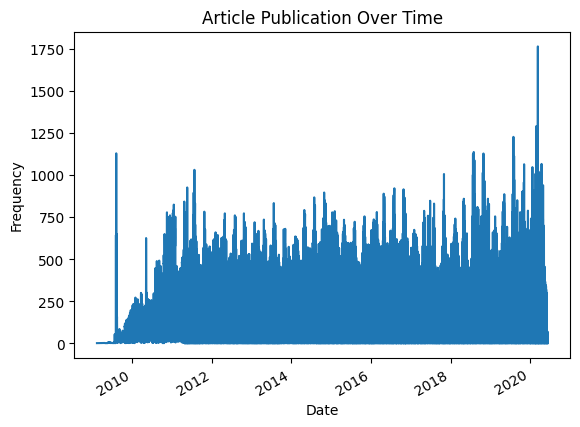

In [62]:
# make a lineplot
spikes.plot(kind='line')
plt.title('Article Publication Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

In [63]:
# are there spikes in article publication
spikes = df.groupby('date').size()
print(spikes)

date
2009-02-14 00:00:00-04:00    1
2009-04-27 00:00:00-04:00    2
2009-04-29 00:00:00-04:00    1
2009-05-22 00:00:00-04:00    1
2009-05-27 00:00:00-04:00    6
                            ..
2020-06-11 16:49:41-04:00    1
2020-06-11 16:51:33-04:00    1
2020-06-11 17:01:39-04:00    1
2020-06-11 17:11:20-04:00    1
2020-06-11 17:12:35-04:00    1
Length: 39957, dtype: int64


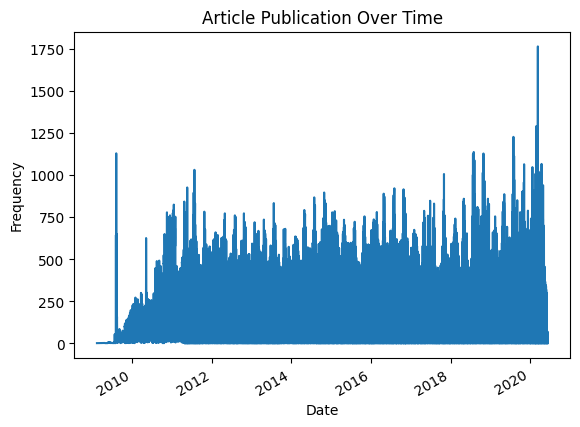

In [64]:
# make a lineplot
spikes.plot(kind='line')
plt.title('Article Publication Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

In [65]:
# are there spikes in article publication by month
spikes_month = df.groupby('month').size()
print(spikes_month)

month
1     121541
2     122835
3     121948
4     121815
5     130339
6     106600
7     110762
8     124042
9      96087
10    124800
11    121431
12    105128
dtype: int64


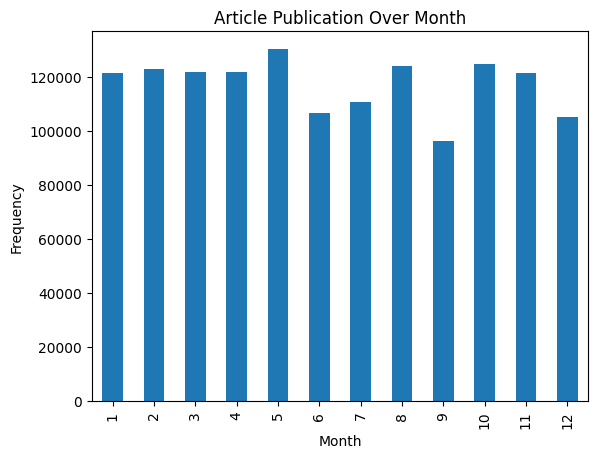

In [66]:
# plot bar 
spikes_month.plot(kind='bar')
plt.title('Article Publication Over Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

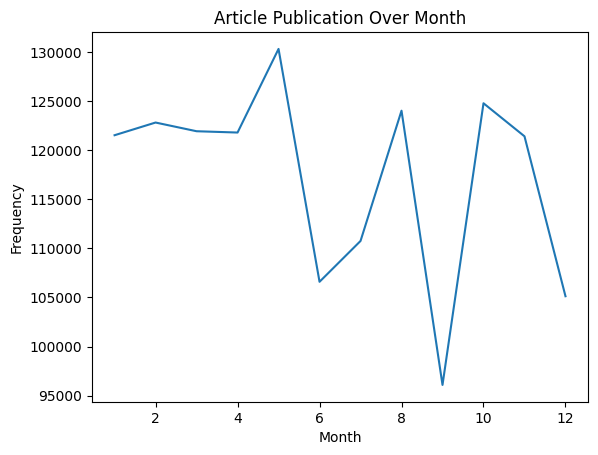

In [67]:
spikes_month.plot(kind='line')
plt.title('Article Publication Over Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

In [68]:
# are there spikes in article publication by year
spikes_year = df.groupby('year').size()
print(spikes_year)

year
2009     11489
2010     81319
2011    131322
2012    122655
2013    121523
2014    134859
2015    135295
2016    141892
2017    124456
2018    146924
2019    150380
2020    105214
dtype: int64


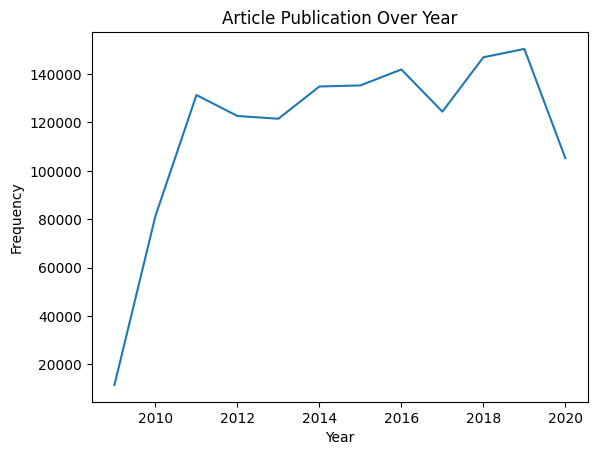

In [69]:
# plot bar
spikes_year.plot(kind='line')
plt.title('Article Publication Over Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [70]:
# which publisher is related to which sentiment considering only top 10 publishers
top_publishers = df['publisher'].value_counts().head(10)
print(top_publishers)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


In [71]:
# relation ship of this top publishers to the sentiment column 
top_publishers_sentiment = df[df['publisher'].isin(top_publishers.index)].groupby(['publisher', 'sentiment']).size()
print(top_publishers_sentiment)

publisher          sentiment
Benzinga Newsdesk  Negative      35531
                   Neutral       59707
                   Positive      55246
Benzinga Staff     Negative       2340
                   Neutral       16985
                   Positive       8789
Charles Gross      Negative      11959
                   Neutral       41516
                   Positive      43257
ETF Professor      Negative       3304
                   Neutral       18321
                   Positive       6864
Eddie Staley       Negative       7018
                   Neutral       31051
                   Positive      19185
Hal Lindon         Negative       4369
                   Neutral       27404
                   Positive      17274
Juan Lopez         Negative       8594
                   Neutral       14799
                   Positive       5045
Lisa Levin         Negative      31688
                   Neutral      109142
                   Positive      46149
Monica Gerson      Negative      10

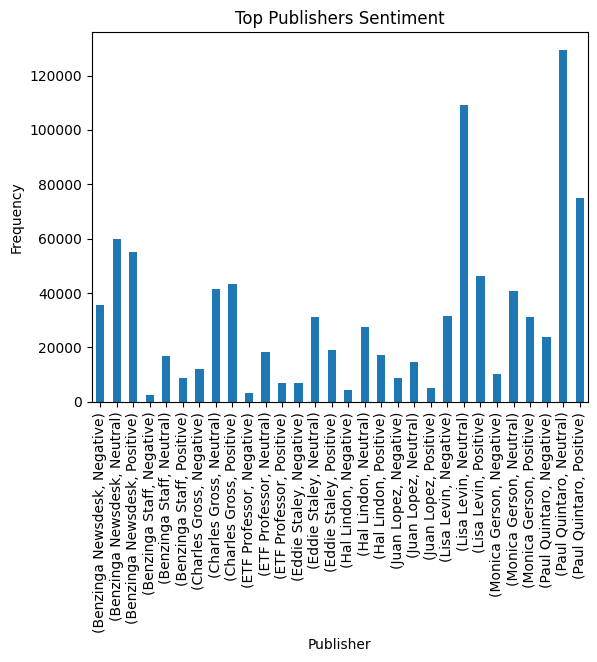

In [72]:
# plot
top_publishers_sentiment.plot(kind='bar')
plt.title('Top Publishers Sentiment')
plt.xlabel('Publisher')
plt.ylabel('Frequency')
plt.show()

In [73]:
# relation ship of top publishers to the sentiment column only the positive 
positive_publishers_sentiment = df[df['publisher'].isin(top_publishers.index) & (df['sentiment'] == 'Positive')].groupby(['publisher', 'sentiment']).size()
print(positive_publishers_sentiment)

publisher          sentiment
Benzinga Newsdesk  Positive     55246
Benzinga Staff     Positive      8789
Charles Gross      Positive     43257
ETF Professor      Positive      6864
Eddie Staley       Positive     19185
Hal Lindon         Positive     17274
Juan Lopez         Positive      5045
Lisa Levin         Positive     46149
Monica Gerson      Positive     31106
Paul Quintaro      Positive     75056
dtype: int64


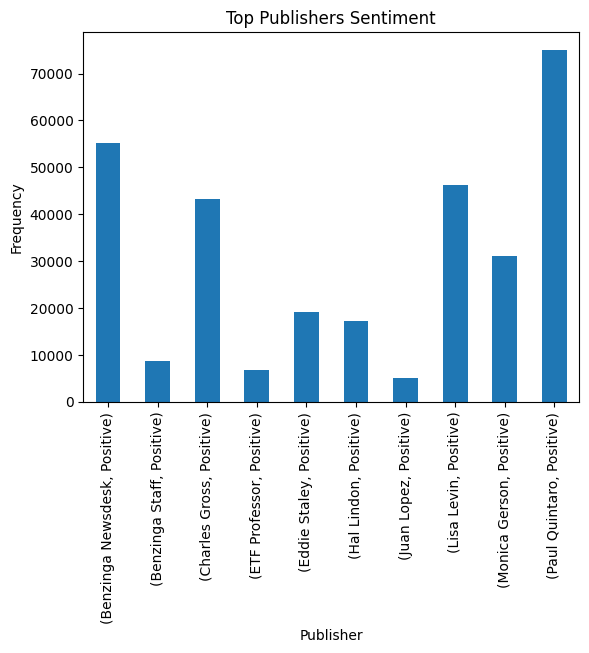

In [74]:
# plot
positive_publishers_sentiment.plot(kind='bar')
plt.title('Top Publishers Sentiment')
plt.xlabel('Publisher')
plt.ylabel('Frequency')
plt.show()

In [75]:
# relation ship of top publishers to the sentiment column only the positive 
negative_publishers_sentiment = df[df['publisher'].isin(top_publishers.index) & (df['sentiment'] == 'Negative')].groupby(['publisher', 'sentiment']).size()
print(negative_publishers_sentiment)

publisher          sentiment
Benzinga Newsdesk  Negative     35531
Benzinga Staff     Negative      2340
Charles Gross      Negative     11959
ETF Professor      Negative      3304
Eddie Staley       Negative      7018
Hal Lindon         Negative      4369
Juan Lopez         Negative      8594
Lisa Levin         Negative     31688
Monica Gerson      Negative     10357
Paul Quintaro      Negative     23874
dtype: int64


In [76]:
# relation ship of top publishers to the sentiment column only the neutral
neutral_publishers_sentiment = df[df['publisher'].isin(top_publishers.index) & (df['sentiment'] == 'Neutral')].groupby(['publisher', 'sentiment']).size()
print(neutral_publishers_sentiment)

publisher          sentiment
Benzinga Newsdesk  Neutral       59707
Benzinga Staff     Neutral       16985
Charles Gross      Neutral       41516
ETF Professor      Neutral       18321
Eddie Staley       Neutral       31051
Hal Lindon         Neutral       27404
Juan Lopez         Neutral       14799
Lisa Levin         Neutral      109142
Monica Gerson      Neutral       40917
Paul Quintaro      Neutral      129443
dtype: int64


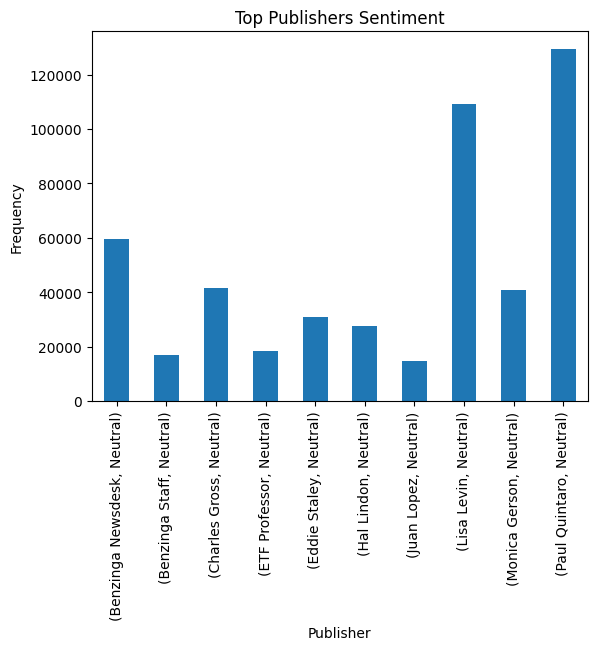

In [77]:
# plot
neutral_publishers_sentiment.plot(kind='bar')
plt.title('Top Publishers Sentiment')
plt.xlabel('Publisher')
plt.ylabel('Frequency')
plt.show()

In [78]:
# which stock is more in positive sentiment
stock_positive_sentiment = df[df['sentiment'] == 'Positive']['stock'].value_counts()
print(stock_positive_sentiment)

stock
WFC      1469
CHK      1284
GILD     1171
NFLX     1158
EBAY     1143
         ... 
PMM         1
BWINB       1
PNF         1
PNI         1
FUTY        1
Name: count, Length: 5663, dtype: int64


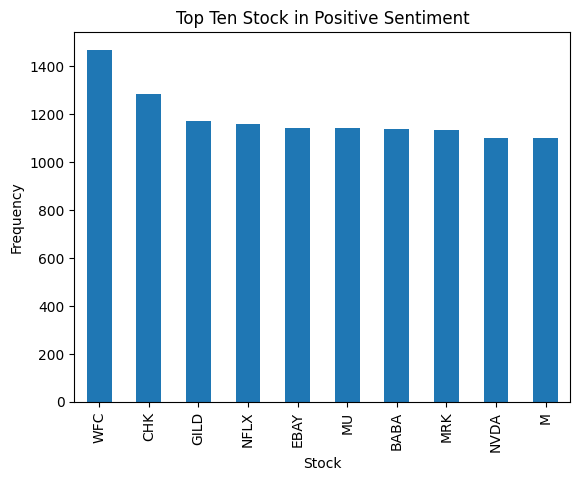

In [79]:
# plot for the top ten stock
stock_positive_sentiment.head(10).plot(kind='bar')
plt.title('Top Ten Stock in Positive Sentiment')
plt.xlabel('Stock')
plt.ylabel('Frequency')
plt.show()

In [80]:
# which stock is more in negative sentiment
stock_negative_sentiment = df[df['sentiment'] == 'Negative']['stock'].value_counts()
print(stock_negative_sentiment)

stock
DKS     752
EWP     656
MRK     637
EWU     626
MS      597
       ... 
ABCW      1
XSW       1
YAO       1
YDKN      1
OVLY      1
Name: count, Length: 5534, dtype: int64


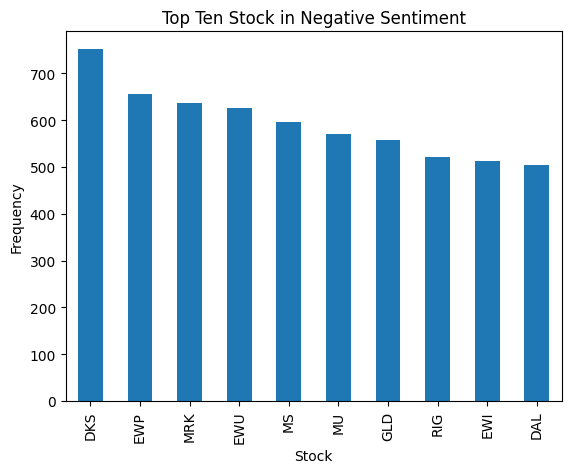

In [81]:
# plot for top ten stock
stock_negative_sentiment.head(10).plot(kind='bar')
plt.title('Top Ten Stock in Negative Sentiment')
plt.xlabel('Stock')
plt.ylabel('Frequency')
plt.show()

In [82]:
# which stock is more in neutral sentiment
stock_neutral_sentiment = df[df['sentiment'] == 'Neutral']['stock'].value_counts()
print(stock_neutral_sentiment)

stock
QQQ     2415
MS      1632
NVDA    1589
MRK     1561
EWJ     1489
        ... 
ADRA       1
ADRD       1
ADZ        1
IFV        1
IGA        1
Name: count, Length: 5950, dtype: int64


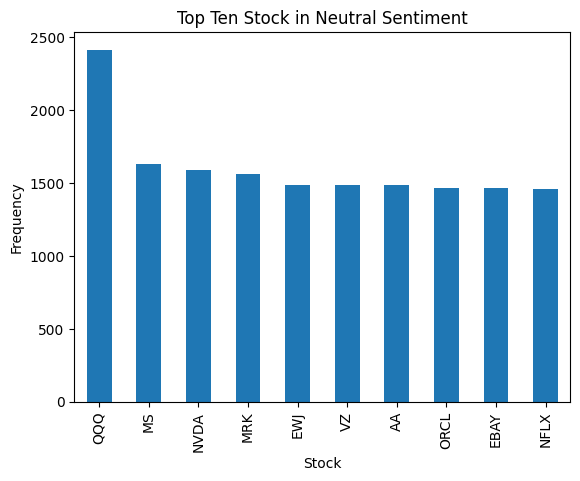

In [83]:
# plot
stock_neutral_sentiment.head(10).plot(kind='bar')
plt.title('Top Ten Stock in Neutral Sentiment')
plt.xlabel('Stock')
plt.ylabel('Frequency')
plt.show()